# Population Density of Mexican States and Municipalities

This Notebook downloads Geopandas GeoDataFrames for States (admin1) and Municipalities (admin2) derived from the 2020 Mexican Census: [INEGI](https://www.inegi.org.mx/temas/mg/).

For details how these dataframe were created, see the [mexican-boundaries](https://github.com/sbl-sdsc/mexico-boundaries) GitHub project.

In [1]:
from io import BytesIO
from urllib.request import urlopen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

## Boundaries of Mexican States

Read boundary polygons for Mexican states from shapefile

In [3]:
admin1_url = 'https://raw.githubusercontent.com/sbl-sdsc/mexico-boundaries/main/data/mexico_admin1.parquet'

In [4]:
resp = urlopen(admin1_url)
admin1 = gpd.read_parquet(BytesIO(resp.read()))

Calculate the area of each state (convert area from m^2 to km^2

In [5]:
admin1.crs

<Projected CRS: PROJCRS["MEXICO_ITRF_2008_LCC",BASEGEOGCRS["MEXICO ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
admin1['area_sqkm'] = admin1['geometry'].area/ 10**6

In [7]:
admin1.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry,area_sqkm
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",73516.697324
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",73970.687326
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57254.511636
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222986


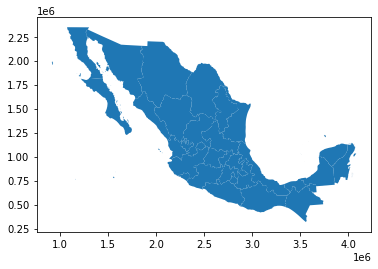

In [8]:
admin1.plot();

## Map of Population by State

Get population from COVID-19 data files

In [9]:
population_admin1 = pd.read_csv('../data/Casos_Diarios_Estado_Nacional_Defunciones_20210620.csv', 
                                usecols=['cve_ent', 'poblacion', 'nombre'])

In [10]:
population_admin1.head()

,cve_ent,poblacion,nombre
0,1,1434635,AGUASCALIENTES
1,2,3634868,BAJA CALIFORNIA
2,3,804708,BAJA CALIFORNIA SUR
3,4,1000617,CAMPECHE
4,7,5730367,CHIAPAS


Add CVE_ENT state code column (example: convert 1 -> 01)

In [11]:
population_admin1['CVE_ENT'] = population_admin1['cve_ent'].apply(lambda i: f'{i:02d}')

In [12]:
population_admin1.head()

,cve_ent,poblacion,nombre,CVE_ENT
0,1,1434635,AGUASCALIENTES,01
1,2,3634868,BAJA CALIFORNIA,02
2,3,804708,BAJA CALIFORNIA SUR,03
3,4,1000617,CAMPECHE,04
4,7,5730367,CHIAPAS,07


Merge the geo dataframe with the population dataframe using the common CVE_ENT column

In [13]:
df_admin1 = admin1.merge(population_admin1, on='CVE_ENT')

In [14]:
df_admin1.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry,area_sqkm,cve_ent,poblacion,nombre
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843,1,1434635,AGUASCALIENTES
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",73516.697324,2,3634868,BAJA CALIFORNIA
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",73970.687326,3,804708,BAJA CALIFORNIA SUR
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57254.511636,4,1000617,CAMPECHE
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222986,5,3218720,COAHUILA


Plot population data

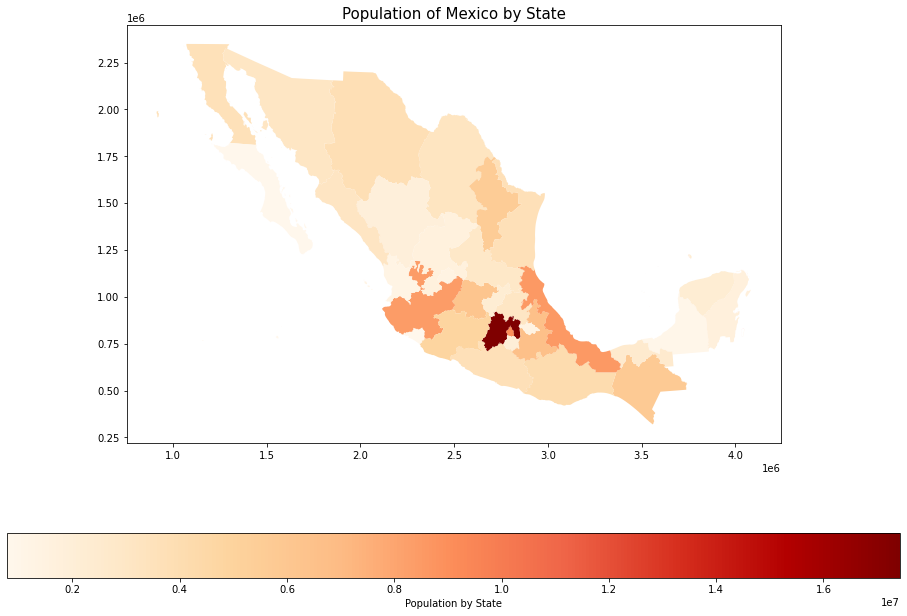

In [15]:
title = 'Population of Mexico by State'
ax1 = df_admin1.plot(column='poblacion', 
                     cmap='OrRd',
                     legend=True, 
                     legend_kwds={'label': 'Population by State', 
                                  'orientation': 'horizontal'},
                     figsize=(16, 11));
ax1.set_title(title, fontsize=15);

In [16]:
df_admin1['population/sqkm']=df_admin1['poblacion']/df_admin1['area_sqkm']

In [17]:
df_admin1.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry,area_sqkm,cve_ent,poblacion,nombre,population/sqkm
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843,1,1434635,AGUASCALIENTES,258.089437
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",73516.697324,2,3634868,BAJA CALIFORNIA,49.442754
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",73970.687326,3,804708,BAJA CALIFORNIA SUR,10.878742
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57254.511636,4,1000617,CAMPECHE,17.476649
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222986,5,3218720,COAHUILA,21.362540


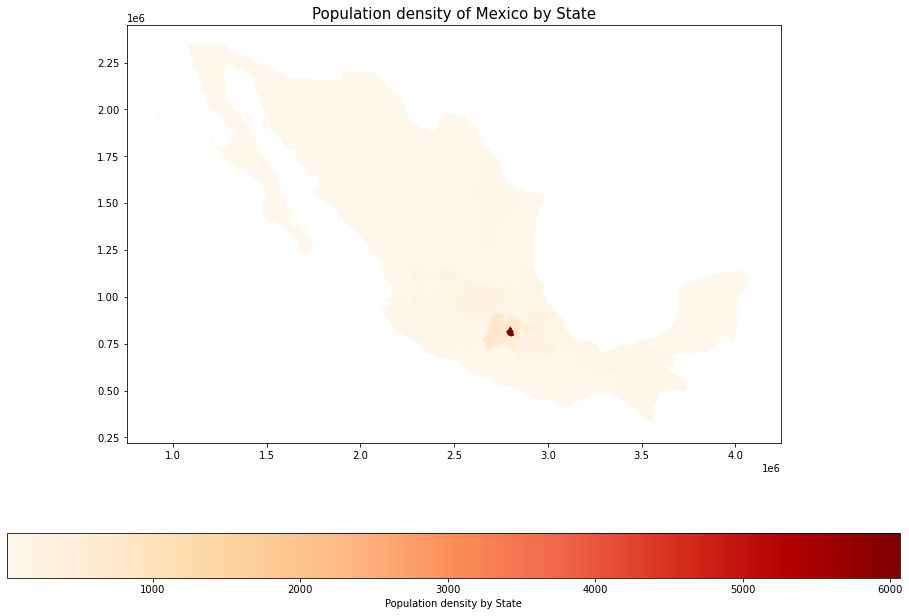

In [18]:
title = 'Population density of Mexico by State'
ax1 = df_admin1.plot(column='population/sqkm', 
                     cmap='OrRd',
                     legend=True, 
                     legend_kwds={'label': 'Population density by State', 
                                  'orientation': 'horizontal'},
                     figsize=(16, 11));
ax1.set_title(title, fontsize=15);

In [23]:
week3_admin1 = pd.read_csv('../data/week3analyzesStates.csv')

In [24]:
week3_admin1.head()

,cve_ent,state,cases_rate,cases_rate_last_60_days,deaths_rate,deaths_rate_last_60_days,population,pct_disability,pct_limitation,pct_mental_problem,pct_no_problems,average_years_finish,pct_no_med_afilation,pct_med_afilation,average_household_size,pct_household_tics,pct_household_no_tics,pct_pop_0_14_years_old,pct_pop_15_64_years_old,pct_pop_65_more_years_old
0,1,AGUASCALIENTES,1860.682334,55.275384,171.193370,5.924852,1434635,4.969487,11.534781,1.405863,82.107156,10.35,18.268619,80.936196,3.68,99.557246,0.442754,26.849687,65.649730,6.766181
1,2,BAJA CALIFORNIA,1383.213916,64.624080,237.917856,4.786969,3634868,4.180207,9.938985,1.444867,88.412151,10.20,23.008181,79.927662,3.26,99.165994,0.834006,24.163271,72.553336,6.747975
2,3,BAJA CALIFORNIA SUR,4501.384353,778.667542,184.663257,14.415167,804708,4.396999,11.213136,1.295252,82.417100,10.34,16.064212,82.529564,3.30,98.915448,1.084552,24.487516,68.228351,6.028646
3,4,CAMPECHE,1107.416724,162.699614,126.421998,5.596547,1000617,5.222678,11.288635,1.230641,75.280652,9.63,20.317864,71.923323,3.55,95.386710,4.613290,24.096932,61.273494,6.979494
4,5,COAHUILA,2155.577372,41.755729,198.091167,2.081573,3218720,4.188497,9.399482,1.089657,83.380505,10.43,18.559334,78.935353,3.48,99.361293,0.638707,25.608938,64.831517,7.132866


In [27]:
week3_admin1['CVE_ENT'] = week3_admin1['cve_ent'].apply(lambda i: f'{i:02d}')
week3_admin1.head()

,cve_ent,state,cases_rate,cases_rate_last_60_days,deaths_rate,deaths_rate_last_60_days,population,pct_disability,pct_limitation,pct_mental_problem,pct_no_problems,average_years_finish,pct_no_med_afilation,pct_med_afilation,average_household_size,pct_household_tics,pct_household_no_tics,pct_pop_0_14_years_old,pct_pop_15_64_years_old,pct_pop_65_more_years_old,CVE_ENT
0,1,AGUASCALIENTES,1860.682334,55.275384,171.193370,5.924852,1434635,4.969487,11.534781,1.405863,82.107156,10.35,18.268619,80.936196,3.68,99.557246,0.442754,26.849687,65.649730,6.766181,01
1,2,BAJA CALIFORNIA,1383.213916,64.624080,237.917856,4.786969,3634868,4.180207,9.938985,1.444867,88.412151,10.20,23.008181,79.927662,3.26,99.165994,0.834006,24.163271,72.553336,6.747975,02
2,3,BAJA CALIFORNIA SUR,4501.384353,778.667542,184.663257,14.415167,804708,4.396999,11.213136,1.295252,82.417100,10.34,16.064212,82.529564,3.30,98.915448,1.084552,24.487516,68.228351,6.028646,03
3,4,CAMPECHE,1107.416724,162.699614,126.421998,5.596547,1000617,5.222678,11.288635,1.230641,75.280652,9.63,20.317864,71.923323,3.55,95.386710,4.613290,24.096932,61.273494,6.979494,04
4,5,COAHUILA,2155.577372,41.755729,198.091167,2.081573,3218720,4.188497,9.399482,1.089657,83.380505,10.43,18.559334,78.935353,3.48,99.361293,0.638707,25.608938,64.831517,7.132866,05


In [28]:
df_admin1 = admin1.merge(week3_admin1, on='CVE_ENT')

In [29]:
df_admin1.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry,area_sqkm,cve_ent,state,cases_rate,cases_rate_last_60_days,deaths_rate,deaths_rate_last_60_days,population,pct_disability,pct_limitation,pct_mental_problem,pct_no_problems,average_years_finish,pct_no_med_afilation,pct_med_afilation,average_household_size,pct_household_tics,pct_household_no_tics,pct_pop_0_14_years_old,pct_pop_15_64_years_old,pct_pop_65_more_years_old
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843,1,AGUASCALIENTES,1860.682334,55.275384,171.193370,5.924852,1434635,4.969487,11.534781,1.405863,82.107156,10.35,18.268619,80.936196,3.68,99.557246,0.442754,26.849687,65.649730,6.766181
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",73516.697324,2,BAJA CALIFORNIA,1383.213916,64.624080,237.917856,4.786969,3634868,4.180207,9.938985,1.444867,88.412151,10.20,23.008181,79.927662,3.26,99.165994,0.834006,24.163271,72.553336,6.747975
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",73970.687326,3,BAJA CALIFORNIA SUR,4501.384353,778.667542,184.663257,14.415167,804708,4.396999,11.213136,1.295252,82.417100,10.34,16.064212,82.529564,3.30,98.915448,1.084552,24.487516,68.228351,6.028646
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57254.511636,4,CAMPECHE,1107.416724,162.699614,126.421998,5.596547,1000617,5.222678,11.288635,1.230641,75.280652,9.63,20.317864,71.923323,3.55,95.386710,4.613290,24.096932,61.273494,6.979494
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222986,5,COAHUILA,2155.577372,41.755729,198.091167,2.081573,3218720,4.188497,9.399482,1.089657,83.380505,10.43,18.559334,78.935353,3.48,99.361293,0.638707,25.608938,64.831517,7.132866


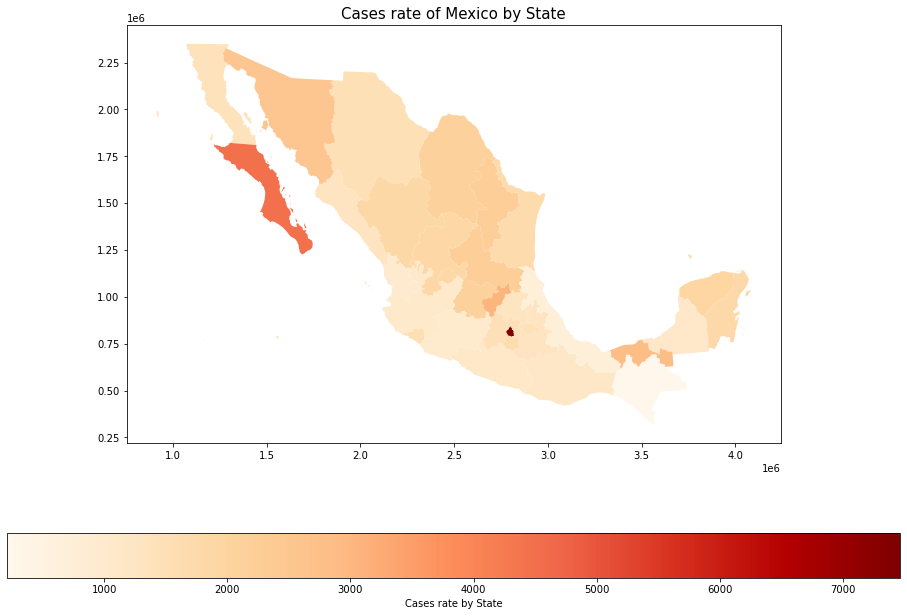

In [30]:
title = 'Cases rate of Mexico by State'
ax1 = df_admin1.plot(column='cases_rate', 
                     cmap='OrRd',
                     legend=True, 
                     legend_kwds={'label': 'Cases rate by State', 
                                  'orientation': 'horizontal'},
                     figsize=(16, 11));
ax1.set_title(title, fontsize=15);

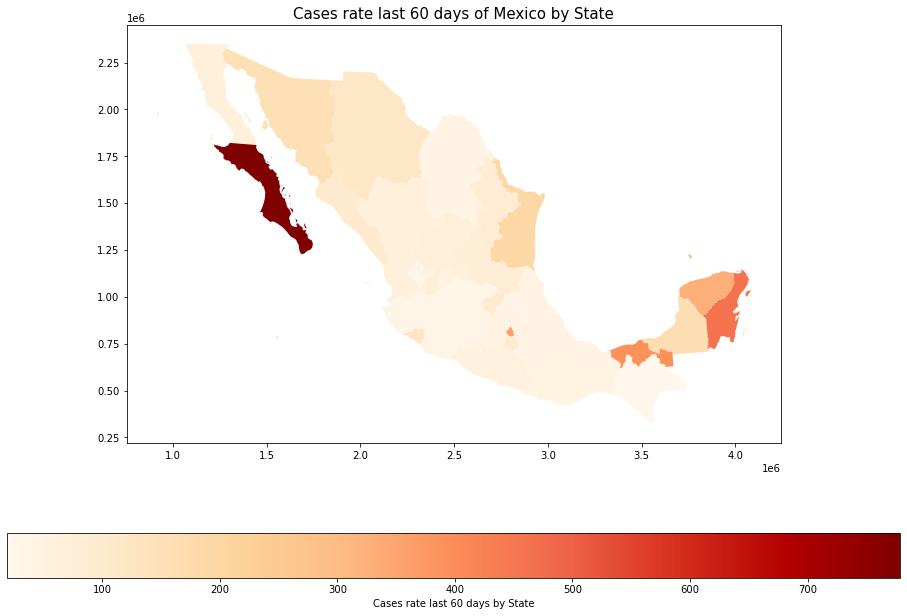

In [31]:
title = 'Cases rate last 60 days of Mexico by State'
ax1 = df_admin1.plot(column='cases_rate_last_60_days', 
                     cmap='OrRd',
                     legend=True, 
                     legend_kwds={'label': 'Cases rate last 60 days by State', 
                                  'orientation': 'horizontal'},
                     figsize=(16, 11));
ax1.set_title(title, fontsize=15);